In [1]:
%pip install numpy pandas matplotlib scikit-learn joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
daata = pd.read_csv('breast-cancer.csv')

In [4]:
daata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
daata.shape

(569, 32)

In [6]:
daata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
daata.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
daata.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
daata.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
daata.drop('id', axis=1, inplace =True)

In [11]:
encoder = LabelEncoder()
daata['diagnosis'] = encoder.fit_transform(daata['diagnosis'])

In [12]:
daata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
print(encoder.classes_)
print(daata['diagnosis'].unique())

['B' 'M']
[1 0]


In [14]:
tarY = daata['diagnosis']
x = daata.drop('diagnosis', axis  = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, tarY, test_size=0.2, random_state=25)

In [16]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9385964912280702

In [17]:
model.predict(X_test)
model.score(X_test,y_test)

0.9385964912280702

In [18]:
fraud = daata[daata['diagnosis'] == 0 ]
fraud.shape

(357, 31)

In [19]:
fraud = fraud.drop('diagnosis', axis=1)

In [20]:
model.predict(fraud)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [21]:
ridge = RidgeClassifier()
modelR = ridge.fit(X_train, y_train)
modelR.score(X_test, y_test)

0.9473684210526315

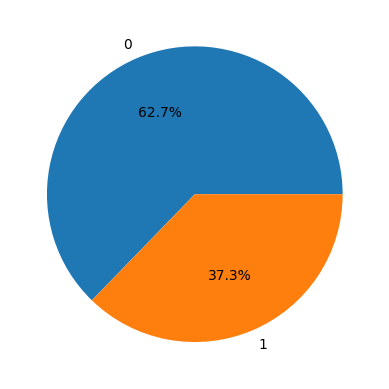

In [22]:
vc = daata['diagnosis'].value_counts()
plt.pie(vc.values, labels = vc.index, autopct = '%1.1f%%')
plt.show()

In [23]:
my_input = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184,
                      0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                      1.095, 0.9053, 8.589, 153.4, 0.006399,
                      0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                      25.38, 17.33, 184.6, 2019.0, 0.1622,
                      0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])

In [24]:
scaler= StandardScaler()
scaler.fit(X_train)
my_input_scaled = scaler.transform(my_input)


c:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
my_input_scaled

array([[ 1.06721317, -2.14034445,  1.23569105,  0.94713529,  1.52985371,
         3.20391357,  2.60559668,  2.47648878,  2.17346458,  2.18642369,
         2.4072422 , -0.56419126,  2.69410618,  2.3261985 , -0.21065367,
         1.35897603,  0.76674872,  0.6422037 ,  1.13012284,  0.92267973,
         1.86293645, -1.39693172,  2.26624016,  1.96154604,  1.29476884,
         2.67844648,  2.19867787,  2.29207341,  2.68554941,  2.04443827]])

In [26]:
y_pred = model.predict(my_input_scaled)

c:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
y_pred_test = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy : 0.9385964912280702
Confusion Matrix:
 [[72  3]
 [ 4 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.92      0.90      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [28]:
modelsvm = SVC()
modelsvm.fit(X_train, y_train)
modelsvm.score(X_test, y_test)

0.9122807017543859

In [29]:
modelrf = RandomForestClassifier(n_estimators=100)
modelrf.fit(X_train, y_train)
modelrf.score(X_test, y_test)

0.956140350877193

In [30]:
modelKF = KFold(n_splits=10, random_state=25, shuffle=True)

for train_index, test_index in modelKF.split(x, tarY):
  print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  0   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  24  25  27  28  29  30  31  32  33  34  35  36  37  38  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 106 107 108 109 110 112 113 114 115 116
 117 118 119 122 123 124 125 126 127 128 129 130 131 132 133 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 160 161 162 163 164 165 166 167 168 169 170 171 172 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 220 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263

In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [32]:
get_score(LogisticRegression(solver = 'liblinear'), X_train, X_test, y_train, y_test)

0.9385964912280702

In [33]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9122807017543859

In [34]:
get_score(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

0.9385964912280702

In [35]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=25, shuffle=True)
skf

StratifiedKFold(n_splits=10, random_state=25, shuffle=True)

In [36]:
pipeline =make_pipeline(StandardScaler(),SVC())

In [37]:
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1],
              'svc__kernel': ['linear', 'rbf']}

In [38]:
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=skf)
grid.fit(x, tarY)

,estimator,"Pipeline(step...svc', SVC())])"
,param_grid,"{'svc__C': [0.001, 0.01, ...], 'svc__gamma': [0.001, 0.01, ...], 'svc__kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [39]:
print("Best parameters:", grid.best_params_)
print("Test accuracy:", grid.score(X_test, y_test))

Best parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Test accuracy: 0.9824561403508771


In [40]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [41]:
modelsvm

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [42]:
import pickle
pickle.dump(scaler, open('scaler_cancer.pkl','wb'))
pickle.dump(modelsvm, open('modelsvm_cancer.pkl','wb'))